# Solutions to Applied Statistics Assessment

In [325]:
# Mathematical functions from the standard library
import math

# Permutations and combinations
import itertools

# Random selections
import random

# Numerical structures and applications
import numpy as np

# Plotting
import matplotlib.pyplot as plt

## Introduction

## Problem 1: Extending the Lady Tasting Tea Experiment

### __Brief__: 

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### __Solution:__

### Simulate the experiment using NumPy

__Simulate this experiment using numpy by randomly shuffling the cups many times__
Select 4 cups to have milk in first.

Randomly shuffle the cups.
Choose 4 cups.
Are the 4 cups chosen the 4 cups that have milk in first?
Store the result.
Repeat the above process many times.

Calculate the probability of the participant correctly identifying __all__ cups.
Compare result with the original 8-cup experiment. 

__Action Plan__
* Set up success list.
* Set up a numpy array with 12 labels. 
* Shuffle the labels. https://numpy.org/doc/2.1/reference/random/generated/numpy.random.shuffle.html
* Choose 4 labels from that array to be milk in first. https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
* Then participant selects 4 labels from the array.
* Do the labels match? If yes store the result as success. 

At end:
* Probability success/no of experiments


__Null Hypothesis:__

* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
* The lady is selecting the four cups from twelve at random.

__Alternative Hypothesis:__
* The lady can tell the difference. 

In [ ]:
# Number of simulation runs.
experiment = 10_000_000

# Counter for the number of times the guess matches the milk selection.
success = 0

for _ in np.arange(experiment):
    # Create an array representing 12 cups labeled 0-11 inclusive.
    cups = np.arange(0, 12)

    # Randomly shuffle the cups.
    np.random.shuffle(cups)

    # Randomly choose 4 cups that have milk added first. Sample without replacement.
    milk = np.sort(np.random.choice(cups, size = 4, replace = False))

    # Randomly guess which cups have milk added first. Sample without replacement.
    guess = np.sort(np.random.choice(cups, size = 4, replace= False))
    
    # If the guess matches the milk selection, count it as a success.
    if np.array_equal(milk, guess):
        success += 1

success

2034

In [327]:
# Calculate the probability of success.
probability = success/experiment
probability

0.002034

https://note.nkmk.me/en/python-numpy-ndarray-compare

Original 8 cup experiment. 1/70

In [341]:
1/70

0.014285714285714285

Cups of Tea

In [328]:
# Total number of cups of tea.
no_cups = 12

# Number of cups with milk first.
no_cups_milk_first = 4

# Number of cups with tea first.
no_cups_tea_first = 8

In [329]:
# Number of ways of selecting four cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)
ways

495

In [330]:
labels = list(range(no_cups))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [331]:
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
#combs

In [332]:
len(combs)

495

In [333]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 5, 9, 11]

In [334]:
set(labels_milk)

{0, 5, 9, 11}

In [335]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {0}
(0, 1, 2, 4) 1 {0}
(0, 1, 2, 5) 2 {0, 5}
(0, 1, 2, 6) 1 {0}
(0, 1, 2, 7) 1 {0}
(0, 1, 2, 8) 1 {0}
(0, 1, 2, 9) 2 {0, 9}
(0, 1, 2, 10) 1 {0}
(0, 1, 2, 11) 2 {0, 11}
(0, 1, 3, 4) 1 {0}
(0, 1, 3, 5) 2 {0, 5}
(0, 1, 3, 6) 1 {0}
(0, 1, 3, 7) 1 {0}
(0, 1, 3, 8) 1 {0}
(0, 1, 3, 9) 2 {0, 9}
(0, 1, 3, 10) 1 {0}
(0, 1, 3, 11) 2 {0, 11}
(0, 1, 4, 5) 2 {0, 5}
(0, 1, 4, 6) 1 {0}
(0, 1, 4, 7) 1 {0}
(0, 1, 4, 8) 1 {0}
(0, 1, 4, 9) 2 {0, 9}
(0, 1, 4, 10) 1 {0}
(0, 1, 4, 11) 2 {0, 11}
(0, 1, 5, 6) 2 {0, 5}
(0, 1, 5, 7) 2 {0, 5}
(0, 1, 5, 8) 2 {0, 5}
(0, 1, 5, 9) 3 {0, 9, 5}
(0, 1, 5, 10) 2 {0, 5}
(0, 1, 5, 11) 3 {0, 11, 5}
(0, 1, 6, 7) 1 {0}
(0, 1, 6, 8) 1 {0}
(0, 1, 6, 9) 2 {0, 9}
(0, 1, 6, 10) 1 {0}
(0, 1, 6, 11) 2 {0, 11}
(0, 1, 7, 8) 1 {0}
(0, 1, 7, 9) 2 {0, 9}
(0, 1, 7, 10) 1 {0}
(0, 1, 7, 11) 2 {0, 11}
(0, 1, 8, 9) 2 {0, 9}
(0, 1, 8, 10) 1 {0}
(0, 1, 8, 11) 2 {0, 11}
(0, 1, 9, 10) 2 {0, 9}
(0, 1, 9, 11) 3 {0, 9, 11}
(0, 1, 10, 11) 2 {0, 11}
(0, 2, 3, 4) 1 {0}
(0, 2, 3, 5) 2 {0,

In [336]:
# Show the overlaps.
print(no_overlaps)

[1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 3, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 

In [337]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

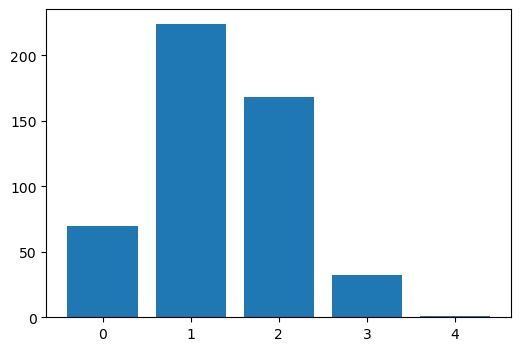

In [338]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

In [339]:
# Probability that she randomly selects the four correct cups
1/495

0.00202020202020202

In [340]:
# Probability that she randomly selects at least 3 correct cups
(32+1)/495

0.06666666666666667

***

## Problem 2: Normal Distribution

__Brief__: Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

## Problem 3: t-Tests

__Brief__: A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference _d_ = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean _d_ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
   
Plot this proportion against _d_, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA

__Brief__: Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
   
Write a short note on why ANOVA is preferred over running several t-tests.

End
***